In [0]:
import time
import random
import numpy as np

import gym

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from random import shuffle

In [0]:
lr = 0.01
gamma = 0.95

NUM_EPISODES = 200
MAX_STEPS = 100
REWARD_AVERAGE_WINDOW = 20


In [0]:
replay_buffer = []

## Load GYM environment

In [30]:
env = gym.make('Pong-v0')

STATE_SHAPE = env.observation_space.shape
NUM_ACTIONS = env.action_space.n

print('Actions: {}'.format(NUM_ACTIONS))
print('States shape: {}'.format(STATE_SHAPE))

Actions: 6
States shape: (210, 160, 3)


## Example of a state

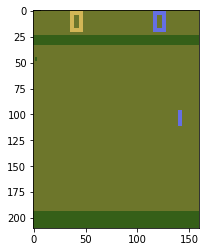

In [31]:
s = env.reset()
_=plt.imshow(s)

## DQN

In [0]:
# Train a DQN model here
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=STATE_SHAPE, filters=16, kernel_size=8, strides=4, activation='relu', data_format="channels_last"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=4, strides=2, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(1, activation='sigmoid')
    tf.keras.layers.Dense(NUM_ACTIONS, activation=None, use_bias=False),
])

 

In [0]:
#def evalQ(s):
    #return model(s[None, ...].astype(np.float32)).numpy()[0]
  
def evalQ(s):
    return model.predict(s[None, ...])[0]

In [0]:
def loss(q1, q2):
    return tf.reduce_sum(tf.square(q1 - q2))

#optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
optimizer = tf.train.RMSPropOptimizer(learning_rate=lr, name='RMSProp')
model.compile(loss=loss, optimizer=optimizer)

pathLenList = []
totalRewardList = []
totalRewardAverageList = []

In [35]:
for i in range(NUM_EPISODES):
    
    eps = 1./((i/50) + 10)
    
    s = env.reset()
    
    totalReward = 0
    step = 0
    
    while step < MAX_STEPS:
        step += 1

        Q_s = evalQ(s)
        
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q_s)

            
        s1, r, done, _ = env.step(a)

        Q_s1 = evalQ(s1)
        
        Q_target = Q_s
        if done:
            Q_target[a] = r
        else:
            Q_target[a] = r + gamma * np.max(Q_s1)
        replay_buffer.append((s, Q_target))
        shuffle(replay_buffer)
        batch_pairs = replay_buffer[0:16]
        
        train_batch = np.array([pair[0] for pair in batch_pairs])
        target_batch = np.array([pair[1] for pair in batch_pairs])
        
 
        #model.train_on_batch(s[None, ...].astype(np.float32), Q_target[None, ...])
        model.train_on_batch(train_batch.astype(np.float32), target_batch)

        totalReward += r
        s = s1
        
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)

    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAverageList.append(totalRewardAverage)
        if i % 100 == 0:
            print('Episode {}: average total reward = {}'.format(i, totalRewardAverage))

Episode 100: average total reward = -1.0


## Virtual display and video recording for Colab

In [36]:
RECORD_VIDEO = True

if RECORD_VIDEO:
  
    !pip install pyvirtualdisplay > /dev/null 2>&1
    !apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

    from pyvirtualdisplay import Display
    display = Display(visible=0, size=(1400, 900))
    display.start()

W0815 12:33:23.528967 140085820897152 abstractdisplay.py:151] xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


## Run simulation

In [38]:
USE_Q = True
if RECORD_VIDEO:
    from gym.wrappers import Monitor
    env_sim = Monitor(env, './video', force=True)
else:
    env_sim = env

s = env_sim.reset()
totalReward = 0

for _ in range(1000):
    env_sim.render()
    #a = env_sim.action_space.sample() # Change to your policy (DQN) 
    if USE_Q:
        Q_s = evalQ(s)
        print('Q_s = ', Q_s)
        
        a = np.argmax(evalQ(s))
        print('a=', a)
        
    else:
        a = env_sim.action_space.sample() 
        
    s, r, done, _ = env_sim.step(a)
    totalReward += r
    if done:        
        break
    
    if not RECORD_VIDEO:
        time.sleep(1./30)
        
env_sim.close()

print('Total reward = {}'.format(totalReward))

Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652    3970.975    2603.8208]
a= 2
Q_s =  [ -2612.69     1416.939    5199.449  -16407.652

## Show the video

In [39]:
def show_video():
    import glob
    import io
    import base64
    from IPython.display import HTML
    from IPython import display as ipythondisplay

    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
            loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{0}" type="video/mp4" />
            </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    
show_video()